In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_excel('test_daniel.xlsx')

In [5]:
df

,Avg Area,Avg D,Avg Time,Avg W,Max Area,Max Time,Min Area,Min Time,Obj heur,Obj mod,Max D,Max W,Min D,Min W,n items
0,0.712,13.932,6.966,0.983,0.96,14.276,0.500,13.779,2.05,1.80,0.90,1.2,0.50,0.75,6
1,0.846,4.796,2.398,1.020,0.96,4.858,0.675,4.757,2.00,1.95,0.90,1.2,0.80,0.75,5
2,1.483,16.532,8.266,0.667,2.00,17.542,1.225,15.944,4.00,4.00,2.45,1.0,2.00,0.50,6
3,1.000,64.250,32.125,1.357,1.50,66.116,0.500,63.712,3.50,3.50,1.00,2.0,0.50,1.00,7
4,1.250,26.896,13.448,1.500,2.00,27.511,0.750,26.593,4.50,4.00,2.00,2.0,0.50,1.00,6
5,1.182,35.506,17.753,1.525,1.50,36.742,0.675,35.096,3.55,3.20,0.90,2.0,0.75,0.75,6
6,0.685,1.562,0.781,0.600,1.76,1.595,0.010,1.538,2.00,1.90,1.60,1.1,0.10,0.10,6
7,1.570,10.738,5.369,0.900,4.25,10.871,0.010,10.683,6.90,6.60,2.50,1.7,0.10,0.10,9


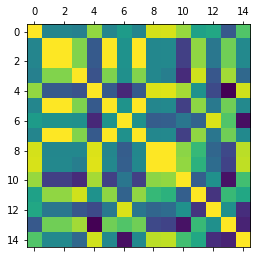

In [6]:
plt.matshow(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52578c4190>,
      dtype=object)

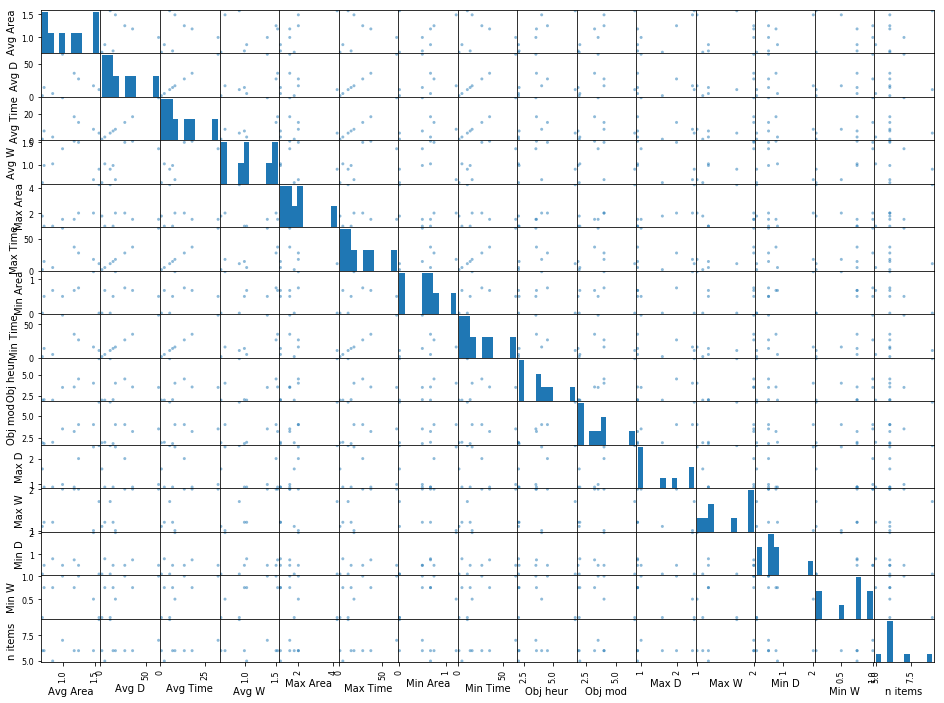

In [7]:
pd.plotting.scatter_matrix(df, figsize=(16,12))

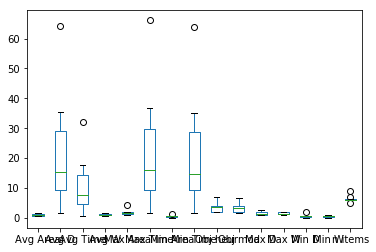

In [8]:
df.plot.box()

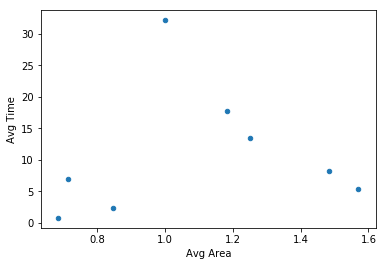

In [9]:
df.plot.scatter('Avg Area', 'Avg Time')

In [12]:
df.corr()

,Avg Area,Avg D,Avg Time,Avg W,Max Area,Max Time,Min Area,Min Time,Obj heur,Obj mod,Max D,Max W,Min D,Min W,n items
Avg Area,1.000000,0.128567,0.128567,0.095200,0.740882,0.131670,0.277770,0.125105,0.896082,0.903599,0.755109,0.314886,0.358780,-0.152454,0.568384
Avg D,0.128567,1.000000,1.000000,0.696176,-0.148923,0.999939,0.213997,0.999970,0.137797,0.146733,-0.297684,0.734752,0.034566,0.655148,0.154933
Avg Time,0.128567,1.000000,1.000000,0.696176,-0.148923,0.999939,0.213997,0.999970,0.137797,0.146733,-0.297684,0.734752,0.034566,0.655148,0.154933
Avg W,0.095200,0.696176,0.696176,1.000000,-0.190770,0.692626,0.200205,0.697964,0.139105,0.081431,-0.406720,0.885163,-0.165089,0.775938,-0.057133
Max Area,0.740882,-0.148923,-0.148923,-0.190770,1.000000,-0.150876,-0.414027,-0.148306,0.913753,0.918742,0.786354,0.214968,-0.244376,-0.601240,0.885475
Max Time,0.131670,0.999939,0.999939,0.692626,-0.150876,1.000000,0.221377,0.999831,0.136454,0.145891,-0.295500,0.730240,0.044256,0.654066,0.151624
Min Area,0.277770,0.213997,0.213997,0.200205,-0.414027,0.221377,1.000000,0.207800,-0.127747,-0.117700,0.027383,-0.091375,0.906719,0.564292,-0.534809
Min Time,0.125105,0.999970,0.999970,0.697964,-0.148306,0.999831,0.207800,1.000000,0.137424,0.146132,-0.300849,0.737266,0.027407,0.654852,0.156964
Obj heur,0.896082,0.137797,0.137797,0.139105,0.913753,0.136454,-0.127747,0.137424,1.000000,0.994412,0.723887,0.470207,-0.075100,-0.250785,0.832113
Obj mod,0.903599,0.146733,0.146733,0.081431,0.918742,0.145891,-0.117700,0.146132,0.994412,1.000000,0.737597,0.425386,-0.033579,-0.277960,0.845353
